# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
path=r"C:\Users\chenh\z_Careerfoundry\A4_Instacart Basket Analysis"

ords_prods_customers_merge=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_aggregated.pkl'))

In [3]:
# Sampling Data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.02

In [4]:
small_sample=ords_prods_customers_merge[dev]

# STEP2 Instructions in the Exercise

## Bar Charts

<AxesSubplot:>

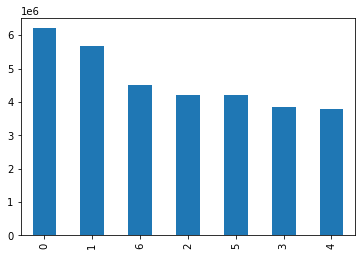

In [5]:
ords_prods_customers_merge['orders_day_of_week'].value_counts().plot.bar()

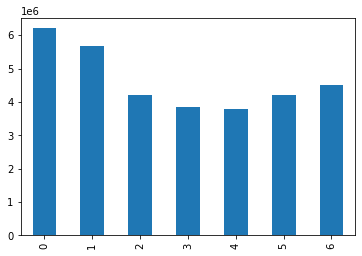

In [6]:
# show as sorted index
bar_day_week=ords_prods_customers_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

## Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

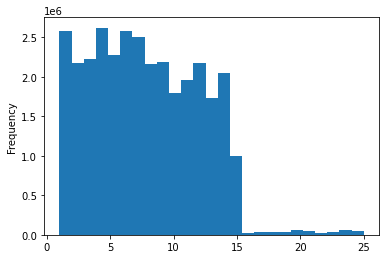

In [7]:
ords_prods_customers_merge['prices'].plot.hist(bins=25)

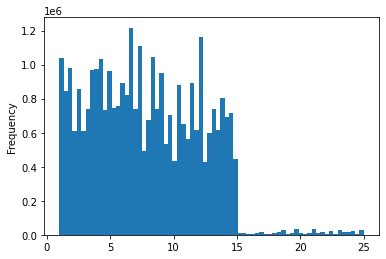

In [8]:
hist_price=ords_prods_customers_merge['prices'].plot.hist(bins=70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

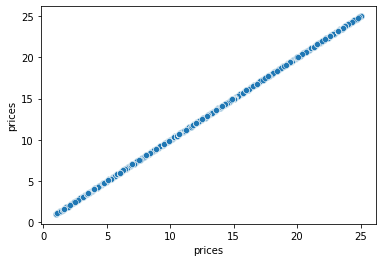

In [9]:
sns.scatterplot(x='prices',y='prices',data=ords_prods_customers_merge)

## Line Charts

In [17]:
small_part = small_sample[['orders_day_of_week','prices']]

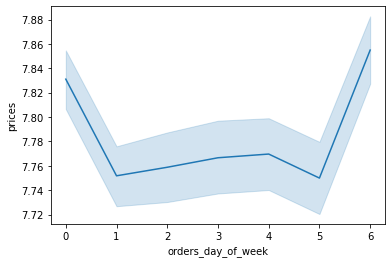

In [18]:
line_day_price=sns.lineplot(data = small_part, x = 'orders_day_of_week',y = 'prices')

# STEP3 Create a histogram of the “order_hour_of_day” column.

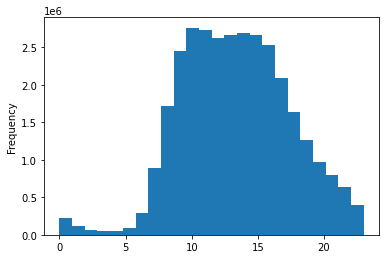

In [10]:
hist_hour=ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins=24)

We can see that the order volume begins to rise from 6 AM, peaks at 10 AM, remains high from 10 AM to 4 PM, and then significantly decreases from 4 PM to 0 PM.

# STEP4 Bar chart from the “loyalty_flag” column

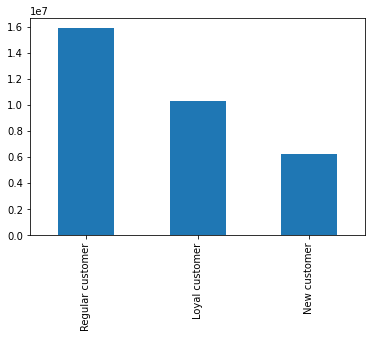

In [11]:
bar_loyalty=ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

Most of the orders are made by Regular customers, followed by Loyal customers and lastly by New customers

# STEP5 Difference in expenditure depending on the hour of the day

In [16]:
small_sample.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,First_Buy,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income,_merge
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
16,3367565,1,6,2,7,19.0,False,12427,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
126,3119091,15,8,2,17,8.0,False,1747,2,0,...,Janet,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both
136,2293453,19,2,5,14,6.0,False,13249,13,0,...,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988,both
251,2208892,19,3,0,14,16.0,False,10823,6,0,...,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988,both


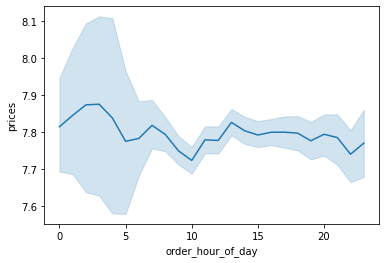

In [12]:
line_hour_prices=sns.lineplot(x='order_hour_of_day',y='prices',data=small_sample)

It seems like there is no relationship between 'hour of day' and 'prices'.

# STEP6 Connections between age and number of dependents

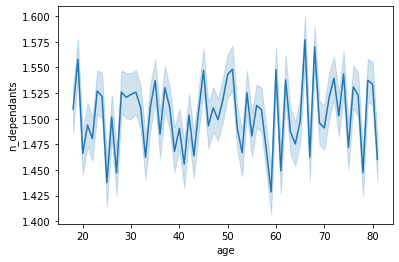

In [24]:
line_age_fam=sns.lineplot(data=small_sample,x='age',y='n_dependants')

There is no clear pattern between age and number of dependent.

# STEP7 connection between age and income

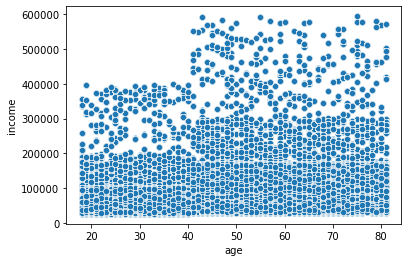

In [13]:
scatter_age_income=sns.scatterplot(x='age',y='income',data=ords_prods_customers_merge)

Although it appears that there is no obvious linear relationship between age and income, the income values vary among different age groups.   
For the group under 40 years old, there are no users with income values above 400K, and there are fewer users between 200K and 400K. Most users in this group have income values below 200K.  
However, for the group over 40 years old, there are many users with income values above 400K, and the distribution of users between 300K and 400K is denser.

# STEP8 Export visualizations

In [14]:
bar_day_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_week.png'))

In [15]:
hist_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price.png'))

In [19]:
line_day_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_day_price.png'))

In [20]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))

In [21]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [22]:
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_hour_prices.png'))

In [25]:
line_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_fam.png'))

In [27]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))